<a href="https://colab.research.google.com/github/INCREDIBLE-AURNOB/NLP/blob/main/recurrent_neural_networks_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# recurrent-neural-networks-embeddings

Use the "Run" button to execute the code.

## Download dataset

In [1]:
import os

In [7]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [8]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

 87% 46.0M/52.6M [00:00<00:00, 107MB/s] 
100% 52.6M/52.6M [00:00<00:00, 106MB/s]


In [9]:
!unzip jigsaw-toxic-comment-classification-challenge.zip -d data

Archive:  jigsaw-toxic-comment-classification-challenge.zip
  inflating: data/sample_submission.csv.zip  
  inflating: data/test.csv.zip       
  inflating: data/test_labels.csv.zip  
  inflating: data/train.csv.zip      


In [10]:
import pandas as pd

In [11]:
raw_df=pd.read_csv("data/train.csv.zip")
test_df=pd.read_csv("data/test.csv.zip")
sub_df=pd.read_csv("data/sample_submission.csv.zip")

In [12]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [14]:
raw_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [22]:
raw_df.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
61951,a5c8fb7117f44b20,Thanks for your reply Scott. If I got your bac...,0,0,0,0,0,0
58464,9c9168ffed28559c,Dakota A. Thomas \n\nThe article Dakota A. Tho...,0,0,0,0,0,0
23000,3cccf373a0318614,"""\n T*U: """"The words """"cannot claim here"""" and...",0,0,0,0,0,0
141260,f3c3a7a2ed47be78,Thrust to Weight Ratio? \n\nBeijing called and...,0,0,0,0,0,0
126498,a4975afb90e1e18f,Don't you think we should stop editing Magersf...,0,0,0,0,0,0


In [21]:
raw_df.comment_text.values[10]

'"\nFair use rationale for Image:Wonju.jpg\n\nThanks for uploading Image:Wonju.jpg. I notice the image page specifies that the image is being used under fair use but there is no explanation or rationale as to why its use in Wikipedia articles constitutes fair use. In addition to the boilerplate fair use template, you must also write out on the image description page a specific explanation or rationale for why using this image in each article is consistent with fair use.\n\nPlease go to the image description page and edit it to include a fair use rationale.\n\nIf you have uploaded other fair use media, consider checking that you have specified the fair use rationale on those pages too. You can find a list of \'image\' pages you have edited by clicking on the ""my contributions"" link (it is located at the very top of any Wikipedia page when you are logged in), and then selecting ""Image"" from the dropdown box. Note that any fair use images uploaded after 4 May, 2006, and lacking such a

In [23]:
target_cols=['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [24]:
for col in target_cols:
  print(raw_df[col].value_counts(normalize=True))

0    0.904156
1    0.095844
Name: toxic, dtype: float64
0    0.990004
1    0.009996
Name: severe_toxic, dtype: float64
0    0.947052
1    0.052948
Name: obscene, dtype: float64
0    0.997004
1    0.002996
Name: threat, dtype: float64
0    0.950636
1    0.049364
Name: insult, dtype: float64
0    0.991195
1    0.008805
Name: identity_hate, dtype: float64


In [25]:
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [26]:
sub_df.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


## Prepare the dataset for training


Create Vocabulary

In [27]:
from torchtext.data.utils import get_tokenizer

In [28]:
tokenizer=get_tokenizer('basic_english')

In [29]:
sample_comment=raw_df.comment_text.values[0]

In [30]:
sample_comment

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [32]:
sample_comment_tokens=tokenizer(sample_comment)
sample_comment_tokens[:10]

['explanation',
 'why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 'hardcore',
 'metallica']

In [33]:
from torchtext.vocab import build_vocab_from_iterator

In [34]:
comment_tokens=raw_df.comment_text.map(tokenizer)


In [38]:
comment_tokens[1][:10]

['d', "'", 'aww', '!', 'he', 'matches', 'this', 'background', 'colour', 'i']

In [39]:
VOCAB_SIZE=1500

In [40]:
unk_token='<unk>'
pad_token='<pad>'

In [41]:
vocab=build_vocab_from_iterator(comment_tokens,
                                specials=[unk_token,pad_token],
                                max_tokens=VOCAB_SIZE)

In [42]:
vocab[unk_token]

0

In [43]:
vocab.set_default_index(vocab[unk_token])

In [44]:
vocab['this']

18

In [45]:
vocab['harcore']

0

In [46]:
sample_indices=vocab.lookup_indices(sample_comment_tokens)

In [48]:
sample_indices[:10]

[667, 85, 3, 140, 142, 185, 39, 663, 0, 0]

In [49]:
sample_comment_recovered=vocab.lookup_tokens(sample_indices)
sample_comment_recovered[:10]

['explanation',
 'why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 '<unk>',
 '<unk>']

## Create Training and Validation sets

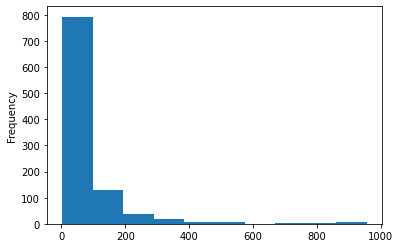

In [53]:
raw_df.comment_text.sample(1000).map(tokenizer).map(len).plot(kind='hist')

In [54]:
MAX_LENGTH=150

In [55]:
def pad_tokens(tokens):
  if (len(tokens)>=MAX_LENGTH):
    return tokens[:MAX_LENGTH]
  else:
    return tokens+[pad_token]*(MAX_LENGTH-len(tokens))

In [69]:
import torch

In [70]:
from torch.utils.data import Dataset

In [71]:
class JigsawDataset(Dataset):
    def __init__(self, df, is_test=False):
        self.df = df
        self.is_test = is_test

    def __getitem__(self, index):
        comment_text = self.df.comment_text.values[index]
        comment_tokens = pad_tokens(tokenizer(comment_text))
        input = torch.tensor(vocab.lookup_indices(comment_tokens))
        if self.is_test:
            target = torch.tensor([0,0,0,0,0,0]).float()
        else:
            target = torch.tensor(self.df[target_cols].values[index]).float()
        return input, target

    def __len__(self):
        return len(self.df)

In [72]:
raw_ds=JigsawDataset(raw_df)

In [73]:
raw_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [74]:
raw_ds[0]


(tensor([ 667,   85,    3,  140,  142,  185,   39,  663,    0,    0, 1287,   96,
          329,   27,   57,    0,    9,   31,    0,    4,   61,    0,   21,   71,
            0,  158,    6,    0,   45,  130, 1167,    0,    0,    2,    8,   55,
           70,    9,   31,  253,    3,  369,   41,    3,   50,   38,  155,    6,
            9,   81,    0,   99,    2,    0,    2,    0,    2,    0,    2, 1122,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,  

In [79]:
from torch.utils.data import random_split

In [80]:
VAL_FRAC=0.25

In [81]:
train_ds,val_ds=random_split(raw_ds,[1-VAL_FRAC,VAL_FRAC])

In [82]:
len(train_ds),len(val_ds)

(119679, 39892)

In [83]:
test_ds=JigsawDataset(test_df,is_test=True)

In [84]:
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [85]:
test_ds[0]

(tensor([   0,  636,    0,  649,   12,   69,    0,   93,   10,    9,  169,  359,
           23,    0,   89,   30,   10,    8,    0,   10, 1488,    0,    2,    2,
            2,    6,   68,  636,    0,    0,    0,  690,    0,    8,  105,   10,
            5,    0,   39,  419,   10,  699,    0,   46,    2,    0,  649,   12,
           47,    0,   15,    0,  668,  439,    2,  443,    0,   13,  332,   21,
          167,    2,    8,    0,   12,  251,    0,   62,    0,   59,   34,   11,
            0,  171,    2,    2,    2,    0,  690,    0,  105,  226,  160,  490,
           95,    2,    4,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,  

## Create pytorch dataloaders

In [76]:
from torch.utils.data import DataLoader

In [77]:
BATCH_SIZE=256

In [86]:
train_dl=DataLoader(train_ds,batch_size=BATCH_SIZE,shuffle=True,num_workers=8,pin_memory=True)
val_dl=DataLoader(val_ds,batch_size=BATCH_SIZE*2,num_workers=8,pin_memory=True)
test_dl=DataLoader(test_ds,batch_size=BATCH_SIZE*2,num_workers=8,pin_memory=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [88]:
for batch in train_dl:
  b_inputs,b_targets=batch
  print('b_inputs.shape',b_inputs.shape)
  print('b_targtes.shape',b_targets.shape)
  break

b_inputs.shape torch.Size([256, 150])
b_targtes.shape torch.Size([256, 6])


## Build a Recurrent Neural Network

In [89]:
import torch.nn as nn
import torch.functional as F

In [90]:
vocab[pad_token]

1

In [91]:
emb_layer=nn.Embedding(VOCAB_SIZE,256,1)

In [92]:
rnn_layer=nn.RNN(256,128,1,batch_first=True)

In [95]:
for batch in train_dl:
  b_inputs, b_targets=batch
  print('b_inputs.shape',b_inputs.shape)
  print('b_targets.shape',b_targets.shape)

  emb_out=emb_layer(b_inputs)
  print('emb_out.shape',emb_out.shape)

  rnn_out,hn=rnn_layer(emb_out)
  print('rnn_out.shape',rnn_out.shape)
  print('hn.shape',hn.shape)

  break

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


b_inputs.shape torch.Size([256, 150])
b_targets.shape torch.Size([256, 6])
emb_out.shape torch.Size([256, 150, 256])
rnn_out.shape torch.Size([256, 150, 128])
hn.shape torch.Size([1, 256, 128])


In [99]:
!pip install pytorch_lightning --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.3/800.3 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 KB 39.6 MB/s eta 0:00:00


In [101]:
import pytorch_lightning as pl
import torch.nn.functional as F
import numpy as np

In [104]:
class JigsawModel(pl.LightningModule):
  def __init__(self):
    super().__init__()
    self.emb=nn.Embedding(VOCAB_SIZE,256,1)
    self.lstm=nn.LSTM(256,128,1,batch_first=True)
    self.linear=nn.Linear(128,6)
    self.learning_rate=0.001

  def forward(self,x):
    out=self.emb(x)
    out,hn=self.lstm(out)
    out=F.relu(out[:,-1,:])
    out=self.linear(out)
    return out

  def training_step(self,batch,batch_idx):
    inputs,targets=batch
    outputs=self(inputs)
    probs=torch.sigmoid(outputs)
    loss=F.binary_cross_entropy(probs,targets)
    return loss
  
  def validation_steps(self,batch,batch_ids):
    inputs,targets=batch
    outputs=self(inputs)
    probs=torch.sigmoid(probs,targets)
    return loss.item()

  def validation_epoch_end(self,validation_step_outputs):
    loss=np.mean(validation_step_outputs)
    print("Epoch #{}; Loss : {:4f} ".format(self.current_epoch,loss))

  def predict_step(self,batch,batch_idx):
    inputs,targets=batch
    outputs=self(inputs)
    probs=torch.sigmoid(outputs)
    return probs

  def configure_optimizers(self):
    return torch.optim.Adam(self.parameters(),lr=self.learning_rate)



In [105]:
model=JigsawModel()

In [106]:
for batch in train_dl:
  b_inputs, b_targets=batch
  print('b_inputs.shape',b_inputs.shape)
  print('b_targets.shape',b_targets.shape)

  outputs=model(b_inputs)
  print('outputs.shape',outputs.shape)
  
  probs=torch.sigmoid(outputs)
  loss=F.binary_cross_entropy(probs,b_targets)
  print('Loss',loss)

  break

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


b_inputs.shape torch.Size([256, 150])
b_targets.shape torch.Size([256, 6])
outputs.shape torch.Size([256, 6])
Loss tensor(0.7047, grad_fn=<BinaryCrossEntropyBackward0>)


## Train and Evaluate the model

In [109]:
trainer = pl.Trainer(max_epochs=3, accelerator='cpu', auto_lr_find=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [111]:
trainer.tune(model,train_dl)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.00478630092322638
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_0f5991a8-38e9-45dd-9587-3163497cf0e9.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint file at /content/.lr_find_0f5991a8-38e9-45dd-9587-3163497cf0e9.ckpt


{'lr_find': <pytorch_lightning.tuner.lr_finder._LRFinder at 0x7f7f286c1b20>}

In [112]:
model.learning_rate

0.00478630092322638

In [113]:
trainer.fit(model,train_dl,val_dl)

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/configuration_validator.py:106: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type      | Params
-------------------------------------
0 | emb    | Embedding | 384 K 
1 | lstm   | LSTM      | 197 K 
2 | linear | Linear    | 774   
-------------------------------------
582 K     Trainable params
0         Non-trainable params
582 K     Total params
2.330     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


## Make Prediction and submit

In [116]:
test_df.head()


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [117]:
for batch in test_dl:
  b_inputs,b_targets=batch
  print('b_inputs.shape',b_inputs.shape)
  print('b_targets.shape',b_targets.shape)
  break

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


b_inputs.shape torch.Size([512, 150])
b_targets.shape torch.Size([512, 6])


In [118]:
test_preds=trainer.predict(model,test_dl)

Predicting: 468it [00:00, ?it/s]

In [119]:
test_preds=torch.cat(test_preds)

In [120]:
test_preds.shape

torch.Size([153164, 6])

In [121]:
test_preds

tensor([[7.7810e-01, 5.2833e-02, 3.1822e-01, 2.5078e-02, 3.8965e-01, 8.0246e-02],
        [7.9085e-03, 7.6261e-05, 1.3566e-03, 1.5618e-04, 1.8895e-03, 4.6768e-04],
        [1.1597e-02, 1.3796e-04, 2.0708e-03, 1.8517e-04, 2.9052e-03, 7.5330e-04],
        ...,
        [6.8522e-03, 6.0432e-05, 1.1522e-03, 1.4791e-04, 1.6102e-03, 3.9050e-04],
        [7.2184e-03, 6.5874e-05, 1.2304e-03, 1.5906e-04, 1.6411e-03, 4.0773e-04],
        [9.1089e-01, 1.1035e-01, 6.6636e-01, 3.7488e-02, 6.3834e-01, 8.3779e-02]])

In [122]:
test_probs=torch.sigmoid(test_preds)

In [123]:
sub_df[target_cols]=test_probs.detach().cpu().numpy()


In [124]:
sub_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.685271,0.513205,0.578891,0.506269,0.596199,0.520051
1,0000247867823ef7,0.501977,0.500019,0.500339,0.500039,0.500472,0.500117
2,00013b17ad220c46,0.502899,0.500035,0.500518,0.500046,0.500726,0.500188
3,00017563c3f7919a,0.501393,0.500013,0.500247,0.500040,0.500399,0.500067
4,00017695ad8997eb,0.501892,0.500020,0.500346,0.500052,0.500552,0.500097
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.503436,0.500042,0.500615,0.500056,0.500860,0.500222
153160,fffd7a9a6eb32c16,0.502301,0.500023,0.500391,0.500047,0.500550,0.500136
153161,fffda9e8d6fafa9e,0.501713,0.500015,0.500288,0.500037,0.500403,0.500098
153162,fffe8f1340a79fc2,0.501805,0.500016,0.500308,0.500040,0.500410,0.500102


In [125]:
sub_df.to_csv('submission.csv',index=None)

In [126]:
!head submission.csv

id,toxic,severe_toxic,obscene,threat,insult,identity_hate
00001cee341fdb12,0.6852712,0.5132053,0.5788907,0.5062691,0.59619915,0.52005076
0000247867823ef7,0.50197715,0.5000191,0.50033915,0.50003904,0.50047237,0.5001169
00013b17ad220c46,0.5028993,0.5000345,0.5005177,0.5000463,0.5007263,0.5001883
00017563c3f7919a,0.50139314,0.5000128,0.5002469,0.50004,0.50039923,0.50006706
00017695ad8997eb,0.5018918,0.50002027,0.5003459,0.50005203,0.50055194,0.50009656
0001ea8717f6de06,0.5031117,0.5000343,0.5005612,0.500094,0.5009965,0.5001452
00024115d4cbde0f,0.5014081,0.5000137,0.50025547,0.5000417,0.50043166,0.5000658
000247e83dcc1211,0.58081925,0.50237936,0.5174529,0.502245,0.52663505,0.50662595
00025358d4737918,0.5017119,0.5000152,0.50028765,0.50003725,0.5004014,0.5000978


In [127]:
sample_df=raw_df.sample(10)

In [128]:
sample_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
142371,f98b4860d10e4a28,I expect my articles to be treated sensitively...,0,0,0,0,0,0
58944,9dda8239c40e38d3,"Hi, please quit vandalizing my user page. I ha...",0,0,0,0,0,0
138177,e36b1255411443dd,Nicholas v R Mess\nPage was just fine and dand...,0,0,0,0,0,0
139861,ec7a9463a894428c,Seems to me that claiming Trump is not a typic...,0,0,0,0,0,0
126518,a4b24d0b57f86980,"""\n\n>> I do not think Mongo, or anyone else h...",0,0,0,0,0,0
92024,f602e6321f840554,I fucked your dad last night you fucking whore...,1,0,1,0,1,0
52952,8d8577e42ae4d82c,"""\nP.S.: I see that 67.235.34.64 has exactly ...",0,0,0,0,0,0
88651,ed262a20490ddab4,Definition of WP:XENODONTLIKEIT for clarity,0,0,0,0,0,0
145482,1d70df06e376bbdc,"See WP:CSD#A7, which says in full: Unremarkabl...",0,0,0,0,0,0
48506,81b1df95bf72f50b,In that sense film director and Obama have som...,0,0,0,0,0,0


In [129]:
sample_ds=JigsawDataset(sample_df)

In [130]:
sample_dl=DataLoader(sample_ds,batch_size=10)

In [131]:
sample_preds=trainer.predict(model,sample_dl)

Predicting: 468it [00:00, ?it/s]

In [132]:
sample_probs=torch.sigmoid(sample_preds[0])

In [133]:
(sample_probs > 0.6).int()

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=torch.int32)

In [134]:
sample_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
142371,f98b4860d10e4a28,I expect my articles to be treated sensitively...,0,0,0,0,0,0
58944,9dda8239c40e38d3,"Hi, please quit vandalizing my user page. I ha...",0,0,0,0,0,0
138177,e36b1255411443dd,Nicholas v R Mess\nPage was just fine and dand...,0,0,0,0,0,0
139861,ec7a9463a894428c,Seems to me that claiming Trump is not a typic...,0,0,0,0,0,0
126518,a4b24d0b57f86980,"""\n\n>> I do not think Mongo, or anyone else h...",0,0,0,0,0,0
92024,f602e6321f840554,I fucked your dad last night you fucking whore...,1,0,1,0,1,0
52952,8d8577e42ae4d82c,"""\nP.S.: I see that 67.235.34.64 has exactly ...",0,0,0,0,0,0
88651,ed262a20490ddab4,Definition of WP:XENODONTLIKEIT for clarity,0,0,0,0,0,0
145482,1d70df06e376bbdc,"See WP:CSD#A7, which says in full: Unremarkabl...",0,0,0,0,0,0
48506,81b1df95bf72f50b,In that sense film director and Obama have som...,0,0,0,0,0,0
